In [31]:
################################
############# Imports ##################
################################

import cv2
from PIL import Image
from skimage import io
import streamlit as st
import pandas as pd
import numpy as np
from PIL import Image
import imagehash
import cv2
import glob
from matplotlib import pyplot as plt


In [53]:
########################################
########  for manual cropping ###############
########################################

cropping = True
x_start, y_start, x_end, y_end = 0, 0, 0, 0
image = cv2.imread(r'C:\Users\ChinmayB\Downloads\playing-cards-lay-in-a-messy-pile.jpg')
image = cv2.resize(image, (1960, 2000))    

oriImage = image.copy()

def mouse_crop(event, x, y, flags, param):
    
    # grab references to the global variables
    global x_start, y_start, x_end, y_end, cropping
    # if the left mouse button was DOWN, start RECORDING
    # (x, y) coordinates and indicate that cropping is being
    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True
    # Mouse is Moving
    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping == True:
            x_end, y_end = x, y
    # if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates
        x_end, y_end = x, y
        cropping = False # cropping is finished
        refPoint = [(x_start, y_start), (x_end, y_end)]
        if len(refPoint) == 2: #when two points were found
            roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
#             print(roi.shape)
#             h= roi.shape[0] 
#             w = roi.shape[1]

            cv2.imshow("Cropped", roi)
            #print(x, y)
            cv2.imwrite("C:/Users/ChinmayB/Desktop/basedata/train/wall/cropped_image_by_mouse_click.jpg",roi)
#             cropped_image = roi
#             cropped_image = np.asarray(cropped_image)
            

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_crop)

#while True:
i = image.copy()
if not cropping:
    cv2.imshow("image", image)
elif cropping:
    cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 255, 0), 3)

    cv2.imshow("image", i)

    cv2.waitKey(0)
    # close all open windows
    cv2.destroyAllWindows()


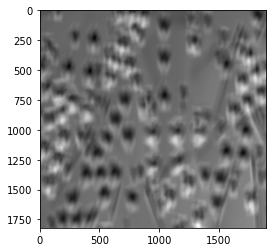

In [54]:
###############################################
###### single Template matching ####################
###############################################
img_rgb = cv2.imread(r'C:\Users\ChinmayB\Downloads\playing-cards-lay-in-a-messy-pile.jpg')
img_rgb = cv2.resize(image, (1960, 2000))    

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread("C:/Users/ChinmayB/Desktop/basedata/train/wall/cropped_image_by_mouse_click.jpg", 0)
h, w = template.shape[::] 

#methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
# For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# For all others it is exactly opposite, max value = good fit.
plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 

cv2.imshow("Matched image", img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

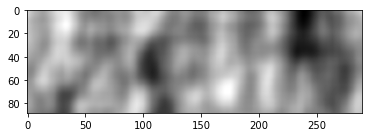

In [41]:
########################################################
########### Template matching for multiple objects #############
#######################################################

import cv2
import numpy as np

img_rgb = cv2.imread(r'C:\Users\ChinmayB\Downloads\playing-cards-lay-in-a-messy-pile.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('C:/Users/ChinmayB/Desktop/basedata/train/wall/cropped_image_by_mouse_click.jpg', 0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')
threshold = 0.8
loc = np.where( res >= threshold)  
for pt in zip(*loc[::-1]):  
       cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  
cv2.imshow("Matched image", img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()